In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats =np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs =zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import the request library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime
from citipy import citipy 

In [5]:
# Create a list for holdimg the cities.
cities =[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will ad it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count.
len(cities)
    

614

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8151fed7ab23e8b1e13bb9325a0f3b3


In [7]:
# Create an empty list to hold the weather data.
city_data =[]
#print the beginning of the logging
print("Begining Data Retrieval        ")
print("--------------------------------")

#Create counters
record_count = 1
set_count =1

#Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50== 0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city
    city_url =url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    #Appnd the city information into city_data list.
        city_data.append({"city": city.title(),
                    "Country": city_country,
                    "Date": city_date,
                     "Lat": city_lat,
                     "Lng":city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed":city_wind})
    
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data loading is complete.
    print("-------------------------------")
    print("Data Retrieval Complete        ")
    print("-------------------------------")
    


Begining Data Retrieval        
--------------------------------
processing Record 1 of Set 13 | vaini
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 13 | hobart
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 13 | svetlaya
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 13 | choix
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 13 | castro
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 13 | lebu
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 13 | charters towers
-------------------------------
Data Retrieval Complete        
---------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 10 of Set 14 | sentyabrskiy
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 14 | kangaatsiaq
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 14 | amderma
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 13 of Set 14 | carnarvon
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 14 of Set 14 | lielvarde
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 15 of Set 14 | narsaq
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Rec

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 15 | flin flon
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 15 | tsihombe
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 15 | dali
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 23 of Set 15 | harper
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 24 of Set 15 | kapaa
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 25 of Set 15 | lichuan
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 26 of Set 15 | zhangjiakou
------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 16 | champerico
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 16 | poya
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 16 | hami
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 16 | east london
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 16 | anloga
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 34 of Set 16 | dharchula
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 35 of Set 16 | kulhudhuffushi
-------------------------------


-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 38 of Set 17 | vardo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 17 | dargaville
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 17 | codrington
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 17 | lompoc
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 17 | cabo san lucas
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 17 | viedma
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 44 of Set 17 | ribeira grande
-------------------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 48 of Set 18 | adre
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 49 of Set 18 | karratha
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 50 of Set 18 | north vernon
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 1 of Set 19 | biak
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 19 | kerman
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 19 | te anau
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 19 | los llanos de aridane
-------------------------------


-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 20 | wanning
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 8 of Set 20 | ngukurr
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 9 of Set 20 | songjianghe
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 10 of Set 20 | maloy
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 20 | gravelbourg
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 20 | mabaruma
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 13 of Set 20 | angoram
---------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 21 | fare
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 17 of Set 21 | sambava
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 18 of Set 21 | zinder
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 19 of Set 21 | najran
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 21 | bubaque
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 21 | roswell
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 21 | ca mau
-------------------------------
Data Retrieval 

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 27 of Set 22 | tokur
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 28 of Set 22 | nianzishan
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 22 | meadville
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 22 | moncao
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 22 | westport
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 22 | otaru
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 22 | bereznik
-------------------------------
Data Re

City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 38 of Set 23 | the valley
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 23 | soyo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 23 | olinda
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 23 | nanakuli
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 23 | jijiga
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 23 | dzhebariki-khaya
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 44 of Set 23 | salekhard
---

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 47 of Set 24 | pangnirtung
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 48 of Set 24 | volot
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 49 of Set 24 | ciudad bolivar
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 50 of Set 24 | halvad
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 1 of Set 25 | sabang
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 25 | nome
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 25 | monrovia
-------------------------------
Data Re

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-10-07 12:44:04,-21.20,-175.20,73.40,100,90,3.36
1,Hobart,AU,2020-10-07 12:41:36,-42.88,147.33,51.80,71,75,5.82
2,Svetlaya,RU,2020-10-07 12:44:04,46.54,138.33,46.63,68,0,7.76
3,Choix,MX,2020-10-07 12:44:04,26.71,-108.32,70.21,35,0,6.42
4,Castro,BR,2020-10-07 12:44:04,-24.79,-50.01,83.07,45,92,5.70
5,Lebu,CL,2020-10-07 12:44:04,-37.62,-73.65,49.95,67,21,6.29
6,Charters Towers,AU,2020-10-07 12:44:04,-20.10,146.27,65.71,72,0,11.70
7,Barrow,US,2020-10-07 12:44:04,71.29,-156.79,30.20,74,90,13.87
8,Atuona,PF,2020-10-07 12:44:04,-9.80,-139.03,77.38,76,8,17.78
9,Hay River,CA,2020-10-07 12:42:07,60.82,-115.80,44.60,93,90,10.29


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into CSV

city_data_df.to_csv(output_data_file,index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module
import time
# Get today's date in seconds.
today = time.time()
today

1602074677.154689

In [12]:
today = time.strftime("%x")
today

'10/07/20'

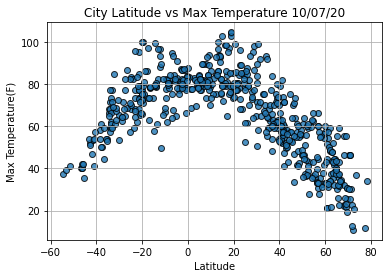

In [13]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

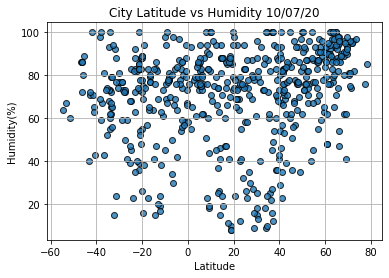

In [14]:
# Build the scatter plot for latitude vs Humidity.
plt.scatter(lats,
           humidity, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

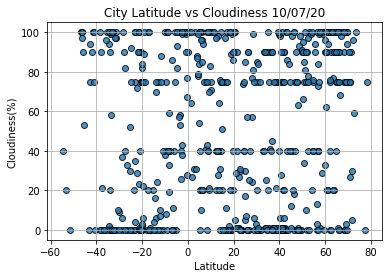

In [15]:
# Build the scatter plot for latitude vs Cloudiness.
plt.scatter(lats,
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

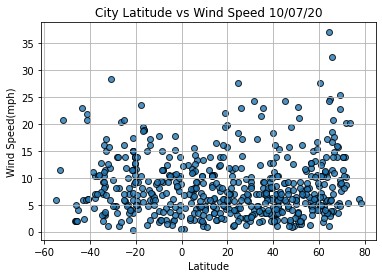

In [16]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [17]:
# Import linear regression from Scipy stats module.
from scipy.stats import linregress

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err)= linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

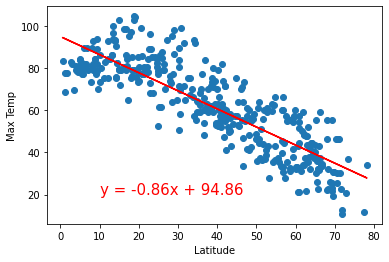

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,20) )

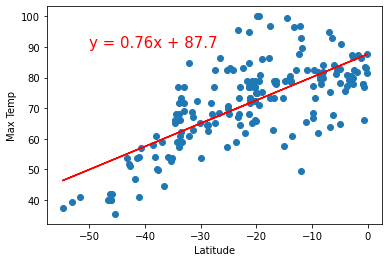

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


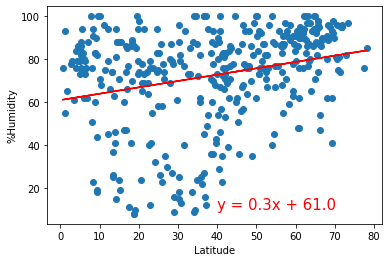

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '%Humidity', (40,10))

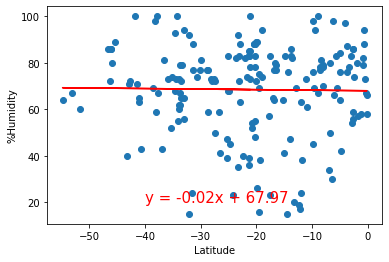

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', '%Humidity', (-40,20))

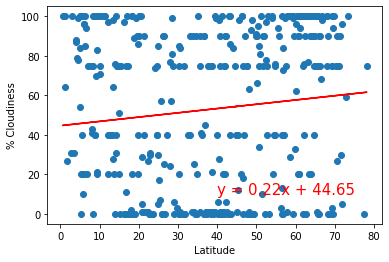

In [24]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,10))

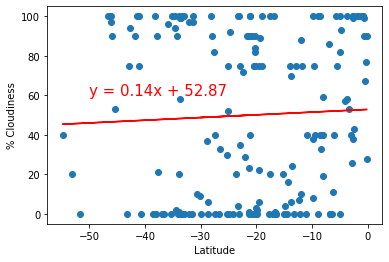

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

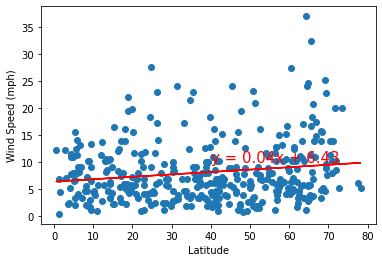

In [26]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (40,10))

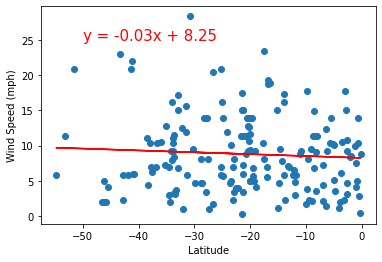

In [27]:
# # Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-50,25))